# Probability

### Basic Probability Theory

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import numpy as np
from torch.distributions import multinomial

In [3]:
fair_probs = torch.ones(6) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [6]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [7]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 0., 1., 1., 5.])

In [8]:
# PyTorch's Multinomial distribution doesn't offer the functionality
# for conducting multiple experiments at once. In such case we can always
# use numpy and later convert the ndarray to a torch tensor
counts = torch.from_numpy(np.random.multinomial(10, fair_probs, size=3))
counts

tensor([[3, 1, 2, 2, 2, 0],
        [2, 2, 1, 1, 2, 2],
        [0, 1, 2, 1, 1, 5]])

In [9]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample().type(torch.float32)
counts / 1000  # Relative frequency as the estimate

tensor([0.1780, 0.1520, 0.1730, 0.1800, 0.1690, 0.1480])

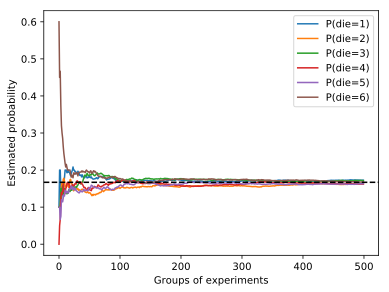

In [10]:
counts = torch.from_numpy(np.random.multinomial(10, fair_probs, size=500))
cum_counts = counts.type(torch.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();